## Analyzing Player Performances v2

In [1]:
#Importing Libraries
import numpy as np #To handle Mathematical calculations
import matplotlib.pyplot as plt #To plot charts 
import matplotlib.cm as cm
import mpldatacursor
%matplotlib inline
import pandas as pd #TO import and manage datasets
import glob
import os

### Importing league points table data (2009-2018)

In [2]:
# path = r'C:\Projects\FYP\Datasets\Whoscored\Points-Table' # use your path
path = r'../Datasets/Whoscored/Points-Table' # use your path
folder = glob.glob(path + "/*.csv")

li = []

for file in folder:
#     df = pd.read_csv(filename, index_col=None, header=0)
    individualTeamDataframe = pd.read_csv(file)
    league = os.path.basename(file).split('-')[0]
    season = os.path.basename(file).split('-')[3]
    individualTeamDataframe['League'] = league
    individualTeamDataframe['Season'] = int(season)
    li.append(individualTeamDataframe)

# combinedDataframe = pd.concat(li, axis=0, ignore_index=True)
combinedTeamDataframe = pd.concat(li)

# dataset = pd.read_csv('C:\Projects\FYP\Datasets\Whoscored\Points-Table\LaLiga-Points-Table-2018-2019.csv')
# league = 'LaLiga'

In [3]:
combinedTeamDataframe

,Rank,Team,Played,Win,Draw,Loss,Goals For,Goals Against,Goal Difference,Points,League,Season
0,1,Bayern Munich,34,20,10,4,72,31,41,70,Bundesliga,2009
1,2,Schalke 04,34,19,8,7,53,31,22,65,Bundesliga,2009
2,3,Werder Bremen,34,17,10,7,71,40,31,61,Bundesliga,2009
3,4,Bayer Leverkusen,34,15,14,5,65,38,27,59,Bundesliga,2009
4,5,Borussia Dortmund,34,16,9,9,54,42,12,57,Bundesliga,2009
...,...,...,...,...,...,...,...,...,...,...,...,...
15,16,Fiorentina,38,8,17,13,47,45,2,41,SerieA,2018
16,17,Genoa,38,8,14,16,39,57,-18,38,SerieA,2018
17,18,Empoli,38,10,8,20,51,70,-19,38,SerieA,2018
18,19,Frosinone,38,5,10,23,29,69,-40,25,SerieA,2018


### Importing player data (2009-2018)

In [4]:
#Combining All Offensive Data
path = r'../Datasets/Whoscored/Player-Stats'
folder = glob.glob(path + "/*Offensive*.csv")

li = []

for file in folder:
    individualOffensivePlayerDataframe = pd.read_csv(file)
    league = os.path.basename(file).split('-')[0]
    season = os.path.basename(file).split('-')[2]
    individualOffensivePlayerDataframe['League'] = league
    individualOffensivePlayerDataframe['Season'] = season
    for index, row in individualOffensivePlayerDataframe.iterrows():
        age = int(row["Age"]) - (2018-int(row["Season"]))
        individualOffensivePlayerDataframe.set_value(index, 'Age', age)
        
        #Cleaning Apps column
        if '(' in row["Apps"] :
            apps = int(row["Apps"].split("(")[0])
            individualOffensivePlayerDataframe.set_value(index, 'Apps', apps)
        else :
            apps = int(row["Apps"])
            individualOffensivePlayerDataframe.set_value(index, 'Apps', apps)
            
        #Cleaning Position column
        if ',' in row["Position"]:
            primary = row["Position"].split(",")[0]
            if '(' in primary:
                primary = primary.split("(")[0]
                individualOffensivePlayerDataframe.set_value(index, 'Position', primary)
            else:
                individualOffensivePlayerDataframe.set_value(index, 'Position', primary)
        elif '(' in row["Position"]:
            primary = row["Position"].split("(")[0]
            individualOffensivePlayerDataframe.set_value(index, 'Position', primary)
            
    li.append(individualOffensivePlayerDataframe)

combinedOffensivePlayerDataframe = pd.concat(li)

C:\Users\Suwadith\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app
C:\Users\Suwadith\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Suwadith\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Suwadith\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Suwadith\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or

In [5]:
#Combining All Defensive Data
path = r'../Datasets/Whoscored/Player-Stats'
folder = glob.glob(path + "/*Defensive*.csv")

li = []

for file in folder:
    individualOffensivePlayerDataframe = pd.read_csv(file)
    league = os.path.basename(file).split('-')[0]
    season = os.path.basename(file).split('-')[2]
    individualOffensivePlayerDataframe['League'] = league
    individualOffensivePlayerDataframe['Season'] = season
    for index, row in individualOffensivePlayerDataframe.iterrows():
        age = int(row["Age"]) - (2018-int(row["Season"]))
        individualOffensivePlayerDataframe.set_value(index, 'Age', age)
        
        #Cleaning Apps column
        if '(' in row["Apps"] :
            apps = int(row["Apps"].split("(")[0])
            individualOffensivePlayerDataframe.set_value(index, 'Apps', apps)
        else :
            apps = int(row["Apps"])
            individualOffensivePlayerDataframe.set_value(index, 'Apps', apps)
            
        #Cleaning Position column  
        if ',' in row["Position"]:
            primary = row["Position"].split(",")[0]
            if '(' in primary:
                primary = primary.split("(")[0]
                individualOffensivePlayerDataframe.set_value(index, 'Position', primary)
            else:
                individualOffensivePlayerDataframe.set_value(index, 'Position', primary)
        elif '(' in row["Position"]:
            primary = row["Position"].split("(")[0]
            individualOffensivePlayerDataframe.set_value(index, 'Position', primary)
    
    li.append(individualOffensivePlayerDataframe)

combinedDefensivePlayerDataframe = pd.concat(li)

C:\Users\Suwadith\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app
C:\Users\Suwadith\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Suwadith\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Suwadith\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Suwadith\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or

In [6]:
#Combining All Passing Data
path = r'../Datasets/Whoscored/Player-Stats'
folder = glob.glob(path + "/*Passing*.csv")

li = []

for file in folder:
    individualOffensivePlayerDataframe = pd.read_csv(file)
    league = os.path.basename(file).split('-')[0]
    season = os.path.basename(file).split('-')[2]
    individualOffensivePlayerDataframe['League'] = league
    individualOffensivePlayerDataframe['Season'] = season
    for index, row in individualOffensivePlayerDataframe.iterrows():
        age = int(row["Age"]) - (2018-int(row["Season"]))
        individualOffensivePlayerDataframe.set_value(index, 'Age', age)
        
        #Cleaning Apps column
        if '(' in row["Apps"] :
            apps = int(row["Apps"].split("(")[0])
            individualOffensivePlayerDataframe.set_value(index, 'Apps', apps)
        else :
            apps = int(row["Apps"])
            individualOffensivePlayerDataframe.set_value(index, 'Apps', apps)
           
        #Cleaning Position column
        if ',' in row["Position"]:
            primary = row["Position"].split(",")[0]
            if '(' in primary:
                primary = primary.split("(")[0]
                individualOffensivePlayerDataframe.set_value(index, 'Position', primary)
            else:
                individualOffensivePlayerDataframe.set_value(index, 'Position', primary)
        elif '(' in row["Position"]:
            primary = row["Position"].split("(")[0]
            individualOffensivePlayerDataframe.set_value(index, 'Position', primary)
    
    li.append(individualOffensivePlayerDataframe)

combinedPassingPlayerDataframe = pd.concat(li)

C:\Users\Suwadith\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app
C:\Users\Suwadith\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Suwadith\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Suwadith\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Suwadith\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or

In [7]:
#Combining All Summary Data
path = r'../Datasets/Whoscored/Player-Stats'
folder = glob.glob(path + "/*Summary*.csv")

li = []

for file in folder:
    individualOffensivePlayerDataframe = pd.read_csv(file)
    league = os.path.basename(file).split('-')[0]
    season = os.path.basename(file).split('-')[2]
    individualOffensivePlayerDataframe['League'] = league
    individualOffensivePlayerDataframe['Season'] = season
    for index, row in individualOffensivePlayerDataframe.iterrows():
        age = int(row["Age"]) - (2018-int(row["Season"]))
        individualOffensivePlayerDataframe.set_value(index, 'Age', age)
        
        #Cleaning Apps column
        if '(' in row["Apps"] :
            apps = int(row["Apps"].split("(")[0])
            individualOffensivePlayerDataframe.set_value(index, 'Apps', apps)
        else :
            apps = int(row["Apps"])
            individualOffensivePlayerDataframe.set_value(index, 'Apps', apps)
            
        #Cleaning Position column    
        if ',' in row["Position"]:
            primary = row["Position"].split(",")[0]
            if '(' in primary:
                primary = primary.split("(")[0]
                individualOffensivePlayerDataframe.set_value(index, 'Position', primary)
            else:
                individualOffensivePlayerDataframe.set_value(index, 'Position', primary)
        elif '(' in row["Position"]:
            primary = row["Position"].split("(")[0]
            individualOffensivePlayerDataframe.set_value(index, 'Position', primary)
            
    
    li.append(individualOffensivePlayerDataframe)

combinedSummaryPlayerDataframe = pd.concat(li)

C:\Users\Suwadith\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app
C:\Users\Suwadith\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Suwadith\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Suwadith\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Suwadith\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or

### Combining all different statistics of players 

In [8]:
#combining all the DFs'

combinedPlayerDataframe = pd.concat([combinedOffensivePlayerDataframe, combinedDefensivePlayerDataframe, combinedPassingPlayerDataframe, combinedSummaryPlayerDataframe], axis=1)

combinedPlayerDataframe = combinedPlayerDataframe.loc[:,~combinedPlayerDataframe.columns.duplicated()]

#Removing all the goal keepers to test whether it improves the accuracy of the model.
# combinedFieldPlayersDf = combinedPlayerDataframe[combinedPlayerDataframe.Position != 'GK']

#Removing field players who have played less than 10 matches
#combinedProperFieldPlayersDf = combinedFieldPlayersDf[~(combinedFieldPlayersDf['Apps'] < 8)]  

In [9]:
combinedPlayerDataframe

,Name,Team,Age,Position,Apps,Minutes,Total goals,Total Assists,Shots per game,Key passes per game,...,Passes per game,Pass success percentage,Crosses per game,Long balls per game,Through balls per game,Total Goals,Yellow cards,Red cards,Aerials won per game,Man of the match
0,Arjen Robben,Bayern Munich,26,M,18,1779,16,6,3.4,1.8,...,34.3,80.2,1.5,2,0.2,16,1,-,0.4,8
1,Stefan Kießling,Bayer Leverkusen,26,FW,33,2924,21,5,3,1.6,...,32.5,72.4,0.2,0.4,0.1,21,3,-,2.1,6
2,Zvjezdan Misimovic,Wolfsburg,28,AM,31,2768,10,13,2.4,3.3,...,51.1,77.5,2.5,5.7,0.5,10,7,-,0.2,8
3,Edin Dzeko,Wolfsburg,24,FW,33,3003,22,7,4.5,1.1,...,19.5,70.7,0.2,1.1,0.1,22,4,-,0.7,6
4,Claudio Pizarro,Werder Bremen,31,AM,23,2130,16,2,2.6,1.3,...,24.2,75.5,0.1,0.8,-,16,4,-,0.4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,Nicky Medja Beloko,Fiorentina,19,Midfielder,0,45,-,-,-,-,...,10,50,-,-,-,-,1,-,1,-
566,Stephy Mavididi,Juventus,21,Forward,0,21,-,-,-,-,...,4,100,-,-,-,-,-,-,-,-
567,Guido Guerrieri,Lazio,23,Goalkeeper,1,90,-,-,-,-,...,27,66.7,-,4,-,-,-,-,-,-
568,Carlo Pinsoglio,Juventus,29,Goalkeeper,1,90,-,-,-,-,...,30,70,-,9,-,-,-,-,-,-


In [10]:
combinedPlayerDataframe = combinedPlayerDataframe.replace("-", 0)

### Normalizing player position column

In [11]:
combinedPlayerDataframe.Position.unique()

array(['M', 'FW', 'AM', 'D', 'Midfielder', 'GK', 'DMC', 'Forward',
       'Defender', 'Goalkeeper', 'midfielder', 'forward'], dtype=object)

In [12]:
combinedPlayerDataframe['Position'].replace(['M'], 'Midfielder', regex=False, inplace=True)
combinedPlayerDataframe['Position'].replace(['midfielder'], 'Midfielder', regex=False, inplace=True)
combinedPlayerDataframe['Position'].replace(['FW'], 'Forward', regex=False, inplace=True)
combinedPlayerDataframe['Position'].replace(['forward'], 'Forward', regex=False, inplace=True)
combinedPlayerDataframe['Position'].replace(['AM'], 'Attacking Midfielder', regex=False, inplace=True)
combinedPlayerDataframe['Position'].replace(['D'], 'Defender', regex=False, inplace=True)
combinedPlayerDataframe['Position'].replace(['GK'], 'Goalkeeper', regex=False, inplace=True)
combinedPlayerDataframe['Position'].replace(['DMC'], 'Defensive Midfielder', regex=False, inplace=True)

In [13]:
combinedPlayerDataframe.Position.unique()

array(['Midfielder', 'Forward', 'Attacking Midfielder', 'Defender',
       'Goalkeeper', 'Defensive Midfielder'], dtype=object)

### Converting to a pivot table (to make seasonal comparisons)

In [14]:
pivot_table_columns = combinedPlayerDataframe.columns.tolist()
pivot_table_columns.remove("Name")
pivot_table_columns.remove("Season")

In [15]:
combinedPlayerDataframePivot = combinedPlayerDataframe.pivot_table(index=['Name'], columns=['Season'],
                     values = pivot_table_columns, aggfunc='first').reset_index()

In [16]:
combinedPlayerDataframePivot

Name Aerials won per game                           \
Season                                       2009 2010 2011 2012 2013 2014   
0            Aaron Cresswell                  NaN  NaN  NaN  NaN  NaN  1.4   
1               Aaron Hughes                  2.4  2.8  1.8  2.9  3.2  NaN   
2                 Aaron Hunt                  0.2  0.2  0.6  0.6  1.1  0.4   
3               Aaron Lennon                    0  0.1  0.2  0.2  0.1  0.2   
4           Aaron Leya Iseka                  NaN  NaN  NaN  NaN  NaN  NaN   
...                      ...                  ...  ...  ...  ...  ...  ...   
9146    Ögmundur Kristinsson                  NaN  NaN  NaN  NaN  NaN  NaN   
9147             Ömer Toprak                  0.2  0.6    1  1.7  3.3  3.8   
9148          Özkan Yildirim                  NaN  NaN  NaN  0.5  0.2    1   
9149            Ørjan Nyland                  NaN  NaN  NaN  NaN  NaN  NaN   
9150            Ümit Korkmaz                  0.2    0  NaN  NaN  NaN  NaN   

                       ... Yellow cards                                     \
Season 2015 2016 2017  ...         2009 2010 2011 2012 2013 2014 2015 2016   
0       1.1  1.4  1.6  ...          NaN  NaN  NaN  NaN  NaN    5    1    2   
1       NaN  NaN  NaN  ...            2    0    0    1    2  NaN  NaN  NaN   
2       1.1  0.6  0.7  ...            3    2    0    3    2    1    2    3   
3         0    0  0.5  ...            1    1    1    1    1    2    1    0   
4       NaN  0.8  NaN  ...          NaN  NaN  NaN  NaN  NaN  NaN  NaN    0   
...     ...  ...  ...  ...          ...  ...  ...  ...  ...  ...  ...  ...   
9146    NaN  NaN  0.5  ...          NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
9147    2.9  2.9  3.2  ...            3    2    5    8    5   10    2    6   
9148      1  NaN  NaN  ...          NaN  NaN  NaN    0    0    0    0  NaN   
9149      0  0.3  NaN  ...          NaN  NaN  NaN  NaN  NaN  NaN    0    0   
9150    NaN  NaN  NaN  ...            2    0  NaN  NaN  NaN  NaN  NaN  NaN   

                  
Season 2017 2018  
0         7    1  
1       NaN  NaN  
2         1  NaN  
3         2    1  
4       NaN    2  
...     ...  ...  
9146      0  NaN  
9147      1    0  
9148    NaN  NaN  
9149    NaN  NaN  
9150    NaN  NaN  

[9151 rows x 331 columns]

In [17]:
combinedPlayerDataframePivot.loc[combinedPlayerDataframePivot['Name'] == 'Aaron Hughes']['Apps']['2018'].tolist()[0]

nan

### Flattening the DF for easier data manipulation

In [18]:
combinedFlattenedDataFrame = combinedPlayerDataframePivot
combinedFlattenedDataFrame.columns = combinedFlattenedDataFrame.columns.map('_'.join)
combinedFlattenedDataFrame.rename(columns={'Name_':'Name'}, inplace=True)
combinedFlattenedDataFrame

,Name,Aerials won per game_2009,Aerials won per game_2010,Aerials won per game_2011,Aerials won per game_2012,Aerials won per game_2013,Aerials won per game_2014,Aerials won per game_2015,Aerials won per game_2016,Aerials won per game_2017,...,Yellow cards_2009,Yellow cards_2010,Yellow cards_2011,Yellow cards_2012,Yellow cards_2013,Yellow cards_2014,Yellow cards_2015,Yellow cards_2016,Yellow cards_2017,Yellow cards_2018
0,Aaron Cresswell,NaN,NaN,NaN,NaN,NaN,1.4,1.1,1.4,1.6,...,NaN,NaN,NaN,NaN,NaN,5,1,2,7,1
1,Aaron Hughes,2.4,2.8,1.8,2.9,3.2,NaN,NaN,NaN,NaN,...,2,0,0,1,2,NaN,NaN,NaN,NaN,NaN
2,Aaron Hunt,0.2,0.2,0.6,0.6,1.1,0.4,1.1,0.6,0.7,...,3,2,0,3,2,1,2,3,1,NaN
3,Aaron Lennon,0,0.1,0.2,0.2,0.1,0.2,0,0,0.5,...,1,1,1,1,1,2,1,0,2,1
4,Aaron Leya Iseka,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9146,Ögmundur Kristinsson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
9147,Ömer Toprak,0.2,0.6,1,1.7,3.3,3.8,2.9,2.9,3.2,...,3,2,5,8,5,10,2,6,1,0
9148,Özkan Yildirim,NaN,NaN,NaN,0.5,0.2,1,1,NaN,NaN,...,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN
9149,Ørjan Nyland,NaN,NaN,NaN,NaN,NaN,NaN,0,0.3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN


### Preprocessing Data

In [19]:
#Removing players who have played less than 10 games in last season
minimum_number_of_games_played = 10
combinedFlattenedDataFrame = combinedFlattenedDataFrame[combinedFlattenedDataFrame['Apps_2018'] > minimum_number_of_games_played]

#Removing players who haven't played in the recent past 2 seasons
#Removing players who have had 0 rating the past season
rating_seasons = ['Rating_2009', 'Rating_2010', 'Rating_2011', 'Rating_2012', 'Rating_2013', 'Rating_2014','Rating_2015', 'Rating_2016', 'Rating_2017', 'Rating_2018']
players_last_seasons = combinedFlattenedDataFrame[rating_seasons[-2:]].isnull().any(axis=1)
players_zero_rating = combinedFlattenedDataFrame[rating_seasons[-1]] == 0 
players_to_remove = players_last_seasons | players_zero_rating
cleanedDataFrame = combinedFlattenedDataFrame[~players_to_remove]

# Preview data
cleanedDataFrame.head()

,Name,Aerials won per game_2009,Aerials won per game_2010,Aerials won per game_2011,Aerials won per game_2012,Aerials won per game_2013,Aerials won per game_2014,Aerials won per game_2015,Aerials won per game_2016,Aerials won per game_2017,...,Yellow cards_2009,Yellow cards_2010,Yellow cards_2011,Yellow cards_2012,Yellow cards_2013,Yellow cards_2014,Yellow cards_2015,Yellow cards_2016,Yellow cards_2017,Yellow cards_2018
0,Aaron Cresswell,NaN,NaN,NaN,NaN,NaN,1.4,1.1,1.4,1.6,...,NaN,NaN,NaN,NaN,NaN,5,1,2,7,1
3,Aaron Lennon,0,0.1,0.2,0.2,0.1,0.2,0,0,0.5,...,1,1,1,1,1,2,1,0,2,1
6,Aaron Meijers,NaN,NaN,NaN,NaN,1,1.4,1.3,1.3,1.6,...,NaN,NaN,NaN,NaN,3,5,7,3,8,8
8,Aaron Mooy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,4
9,Aaron Ramsey,0.7,0,0.3,0.4,0.5,0.6,0.9,0.3,0.4,...,0,1,3,5,3,6,4,3,0,0


## Analyzing Data

### Analyzing seasonal player rating growth & decline

In [20]:
#Identify players who are constantly growing each passing season

progress_columns = ['Name', 
                    'Growth_2009', 'Growth_2010', 'Growth_2011', 'Growth_2012', 'Growth_2013', 'Growth_2014', 
                    'Growth_2015', 'Growth_2016', 'Growth_2017']

#Including rating columns on to the column list
progress_columns.extend(rating_seasons)


players_positive_growth = []

for index in cleanedDataFrame.index:
    
    #get individual player DF
    player = cleanedDataFrame.loc[index]
    
    #drop NaN ratings of players
    player_rating = player[rating_seasons].dropna()
    
    #replace missing growth value with 0 (created by dropped NaN rows)
    current_growth = [0] * (10 - len(player_rating))
    
    #calculate growth difference between seasons (next season rating - current season rating)
    current_growth.extend([player_rating[i+1] - player_rating[i] for i in range(len(player_rating) - 1)])
    
    #calculate the total number of negative growth (decline) seasons
    total_negative_growth_seasons = sum(np.array(current_growth) < 0)
    
    #add players who have never had a negative growth season (decline) in their whole playing career
    if total_negative_growth_seasons == 0:
        row = [player['Name']]
        row.extend(current_growth)
        row.extend(player[rating_seasons])
        players_positive_growth.append(row)

# Create DataFrame and preview it
positivePlayersDf = pd.DataFrame(data=players_positive_growth, columns=progress_columns)
print("Number of players with positive trend:", len(positivePlayersDf))
positivePlayersDf.head()

Number of players with positive trend: 175


,Name,Growth_2009,Growth_2010,Growth_2011,Growth_2012,Growth_2013,Growth_2014,Growth_2015,Growth_2016,Growth_2017,Rating_2009,Rating_2010,Rating_2011,Rating_2012,Rating_2013,Rating_2014,Rating_2015,Rating_2016,Rating_2017,Rating_2018
0,Abdenasser El Khayati,0,0,0,0,0.0,0.0,0.00,0.43,0.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.68,7.11,7.39
1,Adrien Hunou,0,0,0,0,0.0,0.0,0.19,0.06,0.18,NaN,NaN,NaN,NaN,6.19,NaN,NaN,6.38,6.44,6.62
2,Adrien Silva,0,0,0,0,0.0,0.0,0.00,0.00,0.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.40,6.87
3,Albert Gudmundsson,0,0,0,0,0.0,0.0,0.00,0.00,0.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.55,6.68
4,Aleix García,0,0,0,0,0.0,0.0,0.30,0.25,0.05,NaN,NaN,NaN,NaN,NaN,5.96,NaN,6.26,6.51,6.56


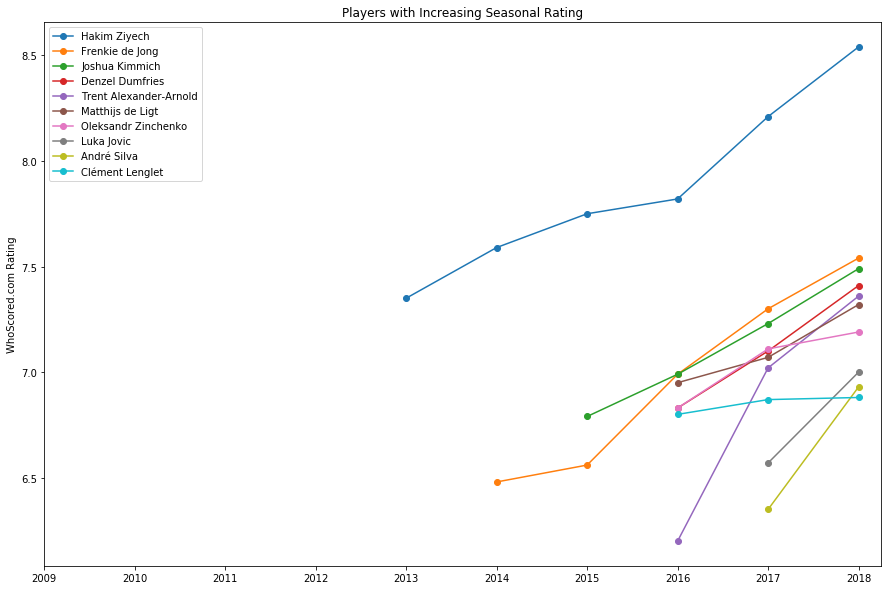

In [21]:
#Plot players who are contantly growing season by season

seasons = ['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']

names = ['André Silva',
         'Clément Lenglet',
         'Denzel Dumfries',
         'Frenkie de Jong',
         'Hakim Ziyech',
         'Joshua Kimmich',
         'Luka Jovic',
         'Matthijs de Ligt',
         'Oleksandr Zinchenko',
         'Trent Alexander-Arnold']
# names = []

#plot only the players listed above
if len(names) > 0:
    data = positivePlayersDf[positivePlayersDf['Name'].isin(names)]
    data = data.sort_values(['Rating_2018'], ascending=False)
    names = data['Name'].values
    data = data.values[:, 10:]
    
#plot al the players if no custom player list given
else:
    data = positivePlayersDf.values[:, 10:]

# Plot data
fig, ax = plt.subplots()
for i_row, row in enumerate(data):
    if len(names) > 0:
        current_player_name = names[i_row]
    else:
        current_player_name = positivePlayersDf.iloc[i_row, :]['Name']
        
    ax.plot(row, marker='o', alpha=1.0, label=current_player_name)
    
# Initialize interactive tooltip
mpldatacursor.datacursor(formatter='{label}'.format)

# Add title and labels
plt.xticks(range(len(seasons)), seasons)
plt.title('Players with Increasing Seasonal Rating')
plt.ylabel('WhoScored.com Rating')
plt.gcf().set_size_inches(15, 10)
if len(names) > 0:
    plt.legend()

In [22]:
#Identify players who are constantly declining each passing season

decline_columns = ['Name', 
                    'Decline_2009', 'Decline_2010', 'Decline_2011', 'Decline_2012', 'Decline_2013', 'Decline_2014', 
                    'Decline_2015', 'Decline_2016', 'Decline_2017']

#Including rating columns on to the column list
decline_columns.extend(rating_seasons)


players_declining_growth = []

for index in cleanedDataFrame.index:
    
    #get individual player DF
    player = cleanedDataFrame.loc[index]
    
    #drop NaN ratings of players
    player_rating = player[rating_seasons].dropna()
    
    #replace missing growth value with 0 (created by dropped NaN rows)
    current_growth = [0] * (10 - len(player_rating))
    
    #calculate growth difference between seasons (next season rating - current season rating)
    current_growth.extend([player_rating[i+1] - player_rating[i] for i in range(len(player_rating) - 1)])
    
    #calculate the total number of positive growth (incease) seasons
    total_positive_growth_seasons = sum(np.array(current_growth) > 0)
    
    #add players who have never had a positive growth season (incease) in their whole playing career
    if total_positive_growth_seasons == 0:
        row = [player['Name']]
        row.extend(current_growth)
        row.extend(player[rating_seasons])
        players_declining_growth.append(row)

#create DataFrame
declinePlayersDf = pd.DataFrame(data=players_declining_growth, columns=decline_columns)
print("Number of players with positive trend:", len(declinePlayersDf))
declinePlayersDf.head()

Number of players with positive trend: 117


,Name,Decline_2009,Decline_2010,Decline_2011,Decline_2012,Decline_2013,Decline_2014,Decline_2015,Decline_2016,Decline_2017,Rating_2009,Rating_2010,Rating_2011,Rating_2012,Rating_2013,Rating_2014,Rating_2015,Rating_2016,Rating_2017,Rating_2018
0,Aaron Mooy,0,0,0,0,0,0.0,0.0,0.00,-0.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.86,6.73
1,Aaron Wan-Bissaka,0,0,0,0,0,0.0,0.0,0.00,-0.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.52,7.27
2,Achraf Hakimi,0,0,0,0,0,0.0,0.0,0.00,-0.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.34,7.11
3,Adam Marusic,0,0,0,0,0,0.0,0.0,0.00,-0.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.82,6.63
4,Adam Masina,0,0,0,0,0,0.0,-0.2,-0.01,-0.21,NaN,NaN,NaN,NaN,NaN,NaN,7.08,6.88,6.87,6.66


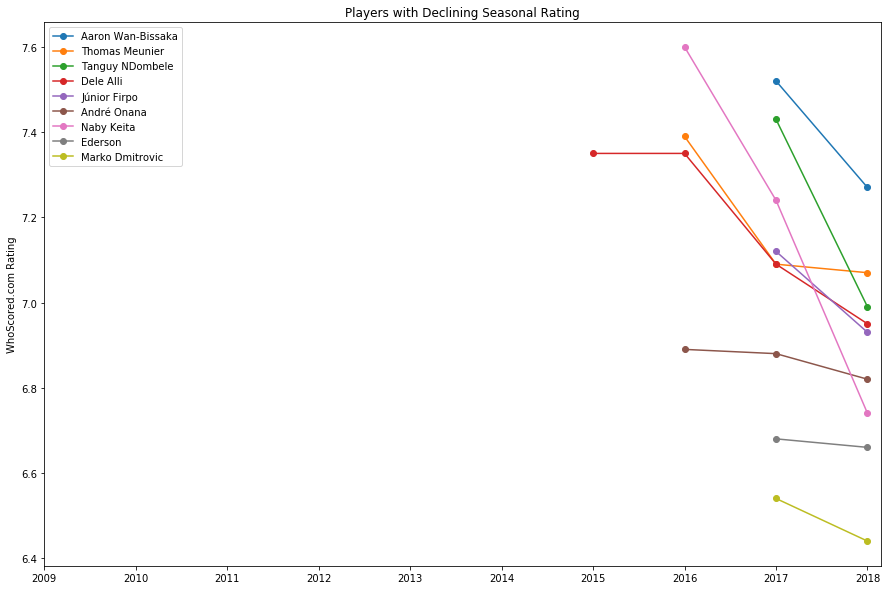

In [23]:
#Plot players who are contantly declining season by season

seasons = ['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']

names = ['Aaron Wan-Bissaka',
         'André Onana',
         'Dele Alli',
         'Ederson',
         'Júnior Firpo',
         'Marko Dmitrovic',
         'Naby Keita',
         'Tanguy NDombele',
         'Thomas Meunier']
# names = []

#plot only the players listed above
if len(names) > 0:
    data = declinePlayersDf[declinePlayersDf['Name'].isin(names)]
    data = data.sort_values(['Rating_2018'], ascending=False)
    names = data['Name'].values
    data = data.values[:, 10:]
    
#plot al the players if no custom player list given
else:
    data = declinePlayersDf.values[:, 10:]

# Plot data
fig, ax = plt.subplots()
for i_row, row in enumerate(data):
    if len(names) > 0:
        current_player_name = names[i_row]
    else:
        current_player_name = declinePlayersDf.iloc[i_row, :]['Name']
        
    ax.plot(row, marker='o', alpha=1.0, label=current_player_name)
    
# Initialize interactive tooltip
mpldatacursor.datacursor(formatter='{label}'.format)

# Add title and labels
plt.xticks(range(len(seasons)), seasons)
plt.title('Players with Declining Seasonal Rating')
plt.ylabel('WhoScored.com Rating')
plt.gcf().set_size_inches(15, 10)
if len(names) > 0:
    plt.legend()

### Identifying overall performance growth & decline since the players' debut

In [24]:
#Calculate overall player rating growth & decline (active players)

overall_columns = ['Name', 'Overall_Difference', 'Team_2018']

overall_columns.extend(rating_seasons)

overall_player_performance_difference = []
for index in cleanedDataFrame.index:
    
    #get individual player DF
    player = cleanedDataFrame.loc[index]
    
    #drop NaN ratings of players
    player_rating = player[rating_seasons].dropna()
    
    #calculate the player's rating difference between his last and first season 
    player_performance_difference = player_rating[-1] - player_rating[0]
    
    row = [player['Name']]
    row.append(player_performance_difference)
    row.append(player['Team_2018'])
    row.extend(player[rating_seasons])
    overall_player_performance_difference.append(row)
    
#create DataFrame
overallPerformanceDf = pd.DataFrame(data=overall_player_performance_difference, columns=overall_columns)
overallPerformanceDf = overallPerformanceDf.sort_values(['Overall_Difference'])
overallPerformanceDf.head()

,Name,Overall_Difference,Team_2018,Rating_2009,Rating_2010,Rating_2011,Rating_2012,Rating_2013,Rating_2014,Rating_2015,Rating_2016,Rating_2017,Rating_2018
193,Cesc Fàbregas,-1.72,Monaco,8.25,7.55,7.44,7.45,7.32,7.62,7.14,7.05,7.10,6.53
1104,Rafael,-1.29,Lyon,7.82,7.24,7.39,7.36,7.05,6.75,6.92,7.03,7.09,6.53
114,Antonio Luna,-1.17,Levante,7.62,7.14,6.75,6.70,6.74,NaN,6.59,6.99,6.70,6.45
130,Asier Riesgo,-1.02,Eibar,NaN,NaN,7.42,6.23,7.23,NaN,6.56,6.14,7.29,6.40
482,Gonzalo Higuaín,-1.01,Chelsea,7.90,7.51,7.31,7.24,7.14,7.09,7.74,7.50,7.25,6.89


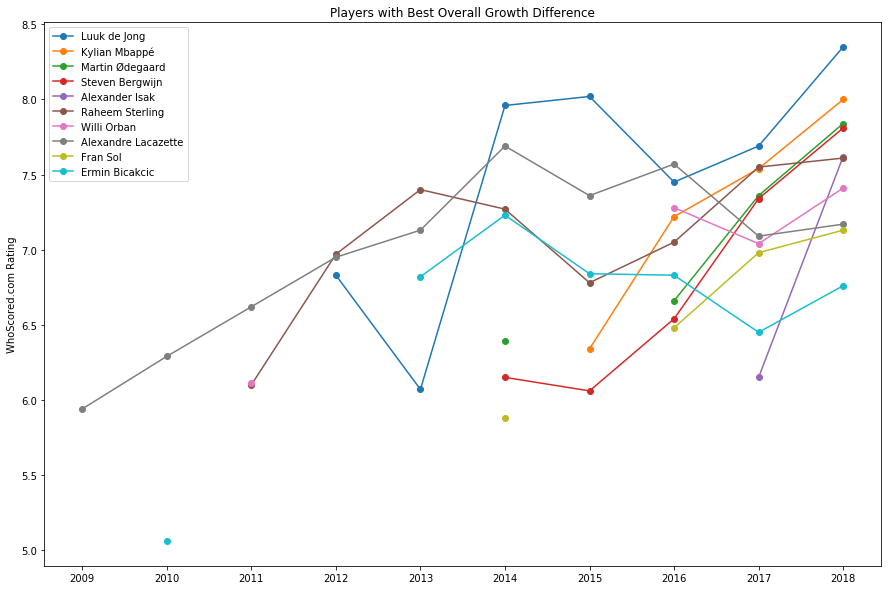

In [25]:
#Plot players with best overall player rating growth

#Players to plot (10)
count = 10 + 1

#get top ten players with highest overall difference 
topTenPlayersDf = overallPerformanceDf.iloc[range(len(overallPerformanceDf)-1, len(overallPerformanceDf)-count, -1), :]

#sort players by last season rating
sorted_top_players = topTenPlayersDf.sort_values(['Rating_2018'], ascending=False)

#get the names of the players
labels = sorted_top_players['Name'].values

#get the ratings of the players
sorted_top_players = sorted_top_players.values[:, 3:]

#get highest growth value
# max_growth = topTenPlayersDf['Overall_Difference'].max()

# Plot data
fig, ax = plt.subplots()
for i_row, row in enumerate(sorted_top_players): 
    current_rating_difference = topTenPlayersDf.iloc[i_row, :]['Overall_Difference']
    current_player_name = labels[i_row]
    ax.plot(row, marker='o', alpha=1.0, label=current_player_name)
# Initialize interactive tooltip
mpldatacursor.datacursor(formatter='{label}'.format)

# Add title and labels
plt.xticks(range(len(seasons)), seasons)
plt.title('Players with Best Overall Growth Difference')
plt.ylabel('WhoScored.com Rating')
plt.gcf().set_size_inches(15, 10)
plt.legend()

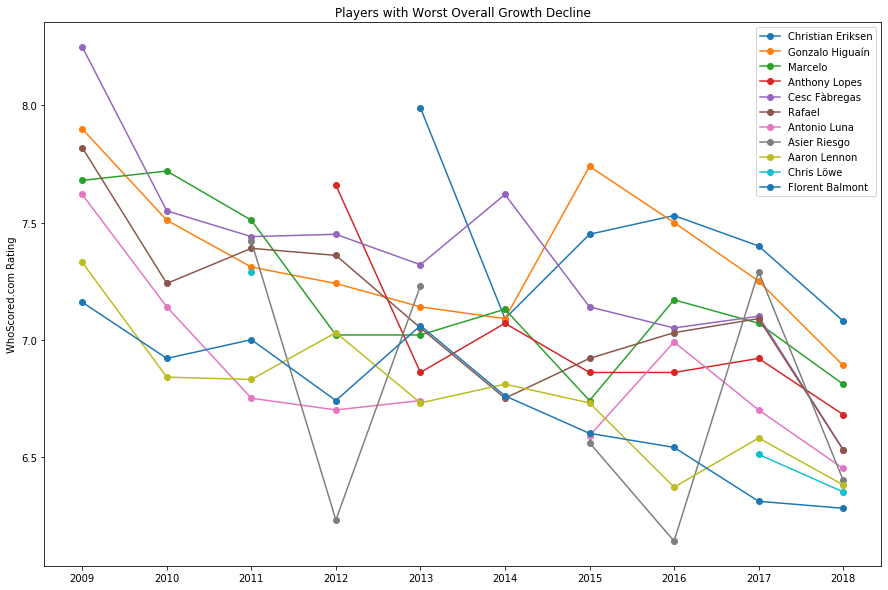

In [26]:
#Plot players with worst overall player rating growth (decline)

#Players to plot (10)
count = 10 + 1

#get worst ten players with lowest overall difference 
worstTenPlayersDf = overallPerformanceDf.iloc[:count, :]

#sort players by last season rating
sorted_worst_players = worstTenPlayersDf.sort_values(['Rating_2018'], ascending=False)

#get the names of the players
labels = sorted_worst_players['Name'].values

#get the ratings of the players
sorted_worst_players = sorted_worst_players.values[:, 3:]

#get highest growth value
# worst_growth = worstTenPlayersDf['Overall_Difference'].min()

# Plot data
fig, ax = plt.subplots()
for i_row, row in enumerate(sorted_worst_players): 
    current_rating_difference = worstTenPlayersDf.iloc[i_row, :]['Overall_Difference']
    current_player_name = labels[i_row]
    ax.plot(row, marker='o', alpha=1.0, label=current_player_name)
# Initialize interactive tooltip
mpldatacursor.datacursor(formatter='{label}'.format)

# Add title and labels
plt.xticks(range(len(seasons)), seasons)
plt.title('Players with Worst Overall Growth Decline')
plt.ylabel('WhoScored.com Rating')
plt.gcf().set_size_inches(15, 10)
plt.legend()

### Analyzing average rating of players

In [27]:
#Calculate the overall mean of the players rating

mean_columns = ['Name', 'Mean', 'Team_2018', 'Position_2018']

mean_columns.extend(rating_seasons)

overall_player_rating_mean = []
for index in cleanedDataFrame.index:
    
    #get individual player DF
    player = cleanedDataFrame.loc[index]
    
    #drop NaN ratings of players
    player_rating = player[rating_seasons].dropna()
    current_player_mean = np.mean(player_rating)
    # Append to dataset
    row = [player['Name']]
    row.append(current_player_mean)
    row.append(player['Team_2018'])
    row.append(player['Position_2018'])
    row.extend(player[rating_seasons])
    overall_player_rating_mean.append(row)
    
# Create DataFrame
overallMeansDf = pd.DataFrame(data=overall_player_rating_mean, columns=mean_columns)
overallMeansDf = overallMeansDf.sort_values(['Mean'])  # sort by delta
overallMeansDf.head()

,Name,Mean,Team_2018,Position_2018,Rating_2009,Rating_2010,Rating_2011,Rating_2012,Rating_2013,Rating_2014,Rating_2015,Rating_2016,Rating_2017,Rating_2018
387,Fabio Ceravolo,6.116667,Parma Calcio 1913,Forward,6.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.73,6.18
1383,Yoel Armougom,6.220000,Caen,Defender,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.08,6.36
608,Johannes Eggestein,6.240000,Werder Bremen,Attacking Midfielder,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.07,6.41
867,Mariusz Stepinski,6.253333,Chievo,Forward,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.41,6.00,6.35
460,Gerard Gumbau,6.253333,Leganes,Defensive Midfielder,NaN,NaN,NaN,NaN,NaN,NaN,6.13,NaN,6.33,6.30


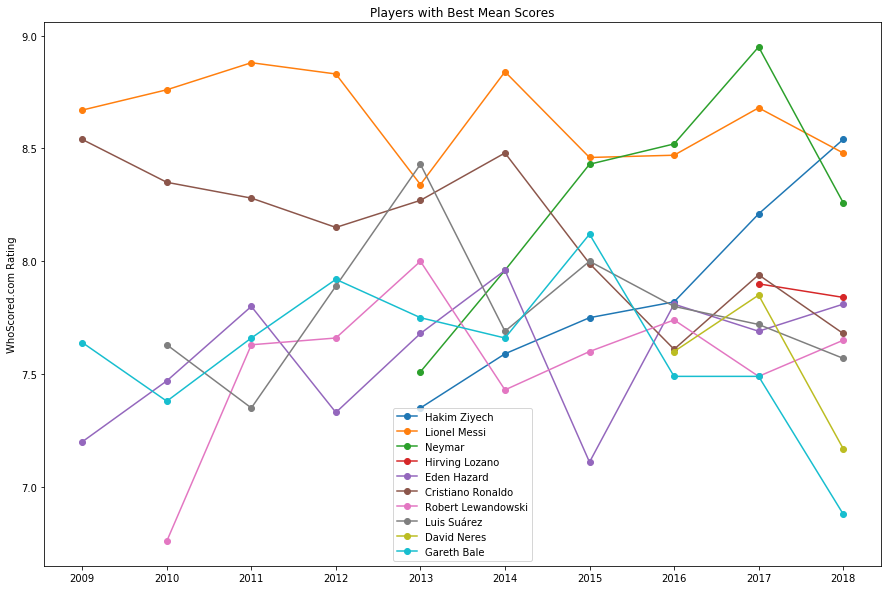

In [28]:
#Plot players with best mean ratings

#Players to plot (10)
count = 10 + 1

#get top ten players with highest mean ratings 
topTenMeanPlayersDf = overallMeansDf.iloc[range(len(overallMeansDf)-1, len(overallMeansDf)-count, -1), :]

#sort players by last season rating
sorted_top_mean_players = topTenMeanPlayersDf.sort_values(['Rating_2018'], ascending=False)

#get the names of the players
labels = sorted_top_mean_players['Name'].values

#get the ratings of the players
sorted_top_mean_players = sorted_top_mean_players.values[:, 4:]

#get highest mean value
# mean_max = topTenMeanPlayersDf['Mean'].max()

# Plot data
fig, ax = plt.subplots()
for i_row, row in enumerate(sorted_top_mean_players):  # for each player...
    current_mean = topTenMeanPlayersDf.iloc[i_row, :]['Mean']
    current_player_name = labels[i_row]
    ax.plot(row, marker='o', alpha=1.0, label=current_player_name)
    
# Initialize interactive tooltip
mpldatacursor.datacursor(formatter='{label}'.format)

# Add title and labels
plt.xticks(range(len(seasons)), seasons)
plt.title('Players with Best Mean Rating')
plt.ylabel('WhoScored.com Rating')
plt.gcf().set_size_inches(15, 10)
plt.legend()

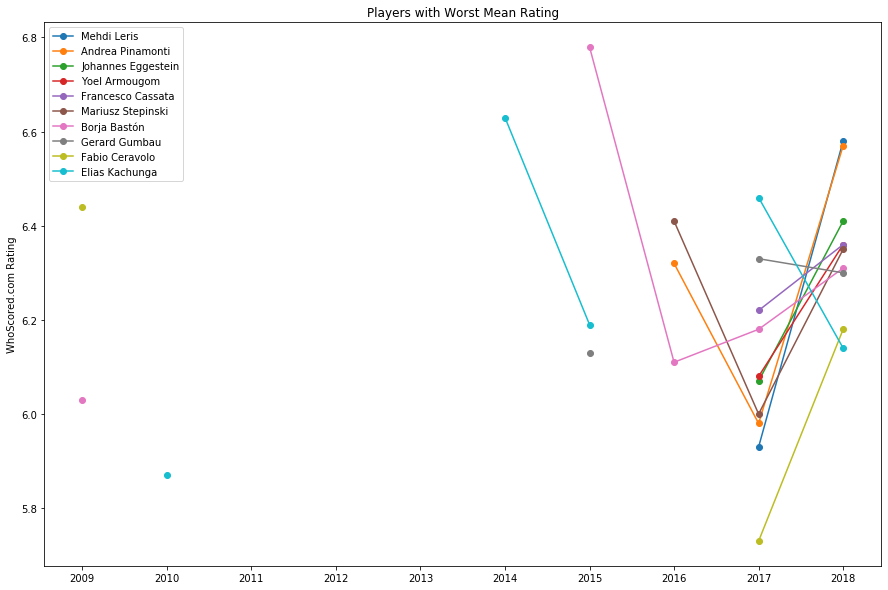

In [35]:
#Plot players with worst mean ratings

#Players to plot (10)
count = 10

#get worst ten players with lowest mean ratings 
worstTenMeanPlayersDf = overallMeansDf.iloc[:count, :]

#sort players by last season rating
sorted_worst_mean_players = worstTenMeanPlayersDf.sort_values(['Rating_2018'], ascending=False)

#get the names of the players
labels = sorted_worst_mean_players['Name'].values

#get the ratings of the players
sorted_worst_mean_players = sorted_worst_mean_players.values[:, 4:]

#get highest mean value
# mean_max = topTenMeanPlayersDf['Mean'].max()

# Plot data
fig, ax = plt.subplots()
for i_row, row in enumerate(sorted_worst_mean_players):  # for each player...
    current_mean = worstTenMeanPlayersDf.iloc[i_row, :]['Mean']
    current_player_name = labels[i_row]
    ax.plot(row, marker='o', alpha=1.0, label=current_player_name)
    
# Initialize interactive tooltip
mpldatacursor.datacursor(formatter='{label}'.format)

# Add title and labels
plt.xticks(range(len(seasons)), seasons)
plt.title('Players with Worst Mean Rating')
plt.ylabel('WhoScored.com Rating')
plt.gcf().set_size_inches(15, 10)
plt.legend()

In [34]:
combinedPlayerDataframe.Position.unique().tolist()

['Midfielder',
 'Forward',
 'Attacking Midfielder',
 'Defender',
 'Goalkeeper',
 'Defensive Midfielder']

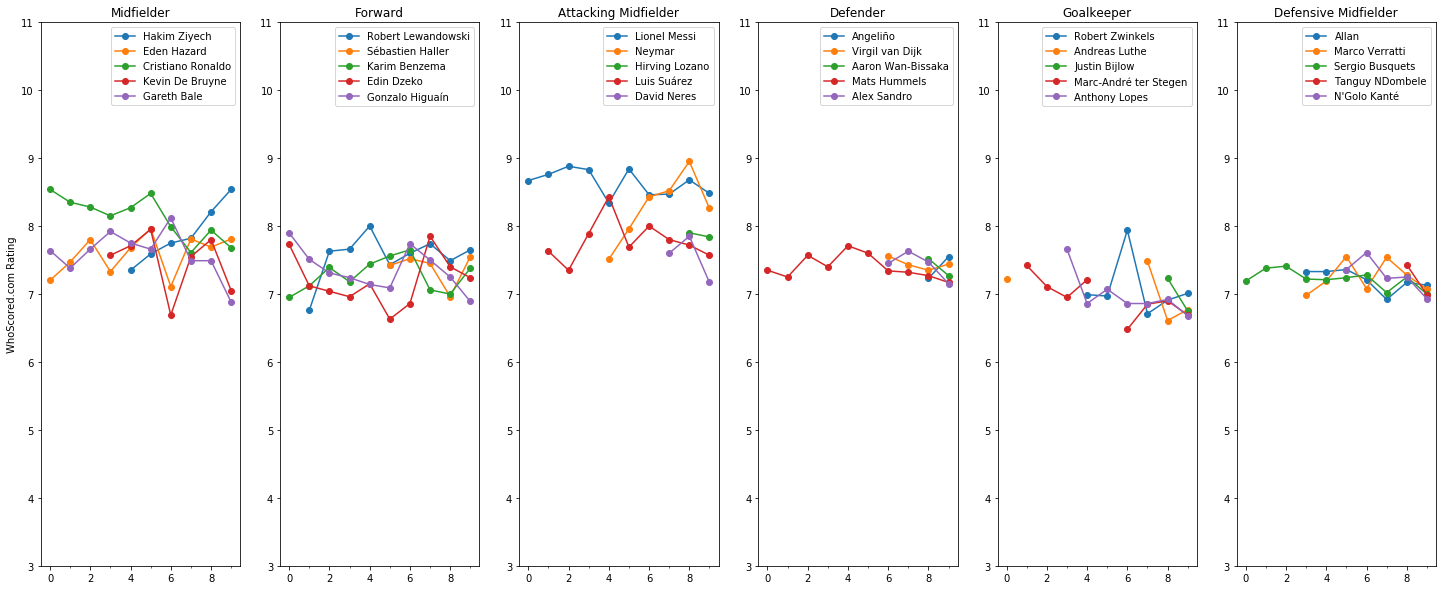

In [31]:
#Plot best players from each position

Positions = combinedPlayerDataframe.Position.unique().tolist()

#Players to plot (5)
count = 5 + 1

#plot 6 subplots in 1 line (all postions in 1 line)
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6)
# fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2)
ax = (ax1, ax2, ax3, ax4, ax5, ax6)

for (plot, position) in enumerate(Positions):  # for each role...
    
    #get player DF (mean) based on position
    df_means_role = overallMeansDf[overallMeansDf['Position_2018'] == position]
    
    #get player DF based on best mean rating (top 5)
    df_means_best_role = df_means_role.iloc[range(len(df_means_role)-1, len(df_means_role)-count, -1), :]
    
    #re arrange DF based on final season rating
    data = df_means_best_role.sort_values(['Rating_2018'], ascending=False)
    
    #get the names of the players
    labels = data['Name'].values
    
    #get all player ratings
    data = data.values[:, 4:]
    
#     mean_max = df_means_best_role['Mean'].max()

    # Plot data
    for i_row, row in enumerate(data):  # for each player...
        current_mean = df_means_best_role.iloc[i_row, :]['Mean']
        current_player_name = labels[i_row]
#         curr_col = cm.prism(curr_mean / mean_max)
        ax[plot].plot(row, marker='o', alpha=1.0, label=current_player_name)

    # Initialize interactive tooltip
    mpldatacursor.datacursor(formatter='{label}'.format)

    # Add title and labels
    ax[plot].set_xticks(range(len(seasons)), seasons)
    ax[plot].set_title(position)
    if plot == 0:
        ax[plot].set_ylabel('WhoScored.com Rating')
    ax[plot].legend()
    plt.gcf().set_size_inches(25, 10)
    ax[plot].set_ylim([3, 11])